## PYTHON DATA ANALYSIS PROJECT.



This notebook analyzes the famous Titanic dataset to identify factors that influenced passenger survival rates during this historic disaster.

## Dataset Information
The dataset contains passenger information including:
- Survival status (0 = No, 1 = Yes)
- Passenger class (1st, 2nd, 3rd)
- Sex, Age, Fare
- Embarkation port, and more

Let's start by importing necessary libraries and loading the data.

In [1]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")

In [3]:
# Load the Titanic dataset
try:
    # Option 1: Load from seaborn's built-in datasets
    titanic = sns.load_dataset('titanic')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
   

Dataset loaded successfully!


## Task 1: Data Exploration

Let's first examine what our data looks like by viewing the first few rows and checking its structure.

In [4]:
# Display the first few rows
print("\nFirst 5 rows of dataset:")
print(titanic.head())


First 5 rows of dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# Explore the structure of the dataset
print("\nDataset info:")
titanic.info()

print("\nCheck for missing values:")
missing_values = titanic.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Check for missing values:
age            177
embarked         2

## Data Cleaning

Most real-world datasets contain missing values. Let's clean our dataset by:
1. Filling missing age values with the median age
2. Handling missing embarkation ports
3. Removing columns with too many missing values

In [6]:
# Clean the dataset
# Fill missing age values with median age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [7]:
# Fill missing embarked values with most common value
if 'embarked' in titanic.columns:
    most_common_embarked = titanic['embarked'].mode()[0]
    titanic['embarked'] = titanic['embarked'].fillna(most_common_embarked)

In [9]:
# Drop the 'deck' column if it exists (too many missing values)
if 'deck' in titanic.columns:
    titanic = titanic.drop('deck', axis=1)

In [10]:
# Confirm cleaning was successful
print("\nRemaining missing values after cleaning:")
missing_after = titanic.isnull().sum()
print(missing_after[missing_after > 0])


Remaining missing values after cleaning:
embark_town    2
dtype: int64


## Task 2: Basic Data Analysis

Now that our data is clean, let's calculate basic statistics to better understand the numerical features in our dataset.

In [11]:
# Task 2: Basic Data Analysis
print("\nBasic statistics of numerical columns:")
print(titanic.describe())


Basic statistics of numerical columns:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Group Analysis

Let's analyze how survival rates differ across various passenger groups.

In [12]:
# Group by sex and calculate mean of numerical columns
print("\nMean values grouped by sex:")
sex_group = titanic.groupby('sex').mean(numeric_only=True)
print(sex_group)


Mean values grouped by sex:
        survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.929936  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.140676  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305  


In [13]:
# Group by passenger class and calculate survival rate
print("\nSurvival rate by passenger class:")
class_survival = titanic.groupby('pclass')['survived'].mean().sort_values(ascending=False)
print(class_survival)



Survival rate by passenger class:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [14]:
# Additional analysis: Age groups and survival
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100], 
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = titanic.groupby('age_group')['survived'].mean().sort_values(ascending=False)
print("\nSurvival rate by age group:")
print(age_survival)


Survival rate by age group:
age_group
Child          0.579710
Teen           0.428571
Adult          0.400000
Young Adult    0.353271
Senior         0.227273
Name: survived, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_11548\2530618512.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].mean().sort_values(ascending=False)


## Task 3: Data Visualization

Visualizations help us understand patterns more intuitively. Let's create multiple chart types to analyze survival patterns:

1. Line chart: Shows the relationship between age and survival rate
2. Bar chart: Compares survival rates across passenger classes  
3. Histogram: Explores the age distribution of passengers
4. Scatter plot: Examines the relationship between age, fare, and survival

In [15]:
# Task 3: Data Visualization
# Create a figure with subplots
plt.figure(figsize=(20, 16))

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_11548\2933792979.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_data = titanic.groupby(pd.cut(titanic['age'], 10))['survived'].mean()


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '(64.084, 72.042]'),
  Text(0.0, 0, '(0.34, 8.378]'),
  Text(2.0, 0, '(16.336, 24.294]'),
  Text(4.0, 0, '(32.252, 40.21]'),
  Text(6.0, 0, '(48.168, 56.126]'),
  Text(8.0, 0, '(64.084, 72.042]'),
  Text(10.0, 0, '')])

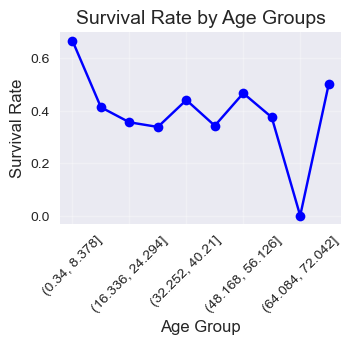

In [16]:
# 1. Line chart: Age vs Survival rate
plt.subplot(2, 2, 1)
age_survival_data = titanic.groupby(pd.cut(titanic['age'], 10))['survived'].mean()
age_survival_data.plot(kind='line', marker='o', color='blue')
plt.title('Survival Rate by Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

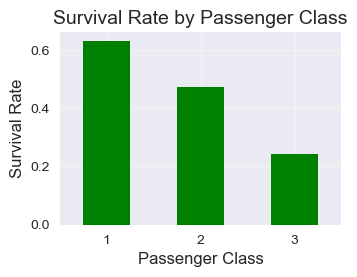

In [17]:
# 2. Bar chart: Class comparison
plt.subplot(2, 2, 2)
class_survival.plot(kind='bar', color='green')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

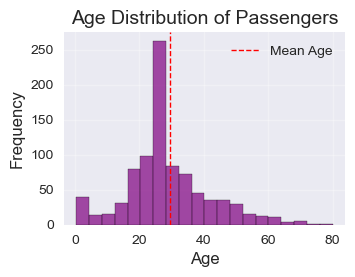

In [18]:
# 3. Histogram: Age distribution
plt.subplot(2, 2, 3)
plt.hist(titanic['age'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(titanic['age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.title('Age Distribution of Passengers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

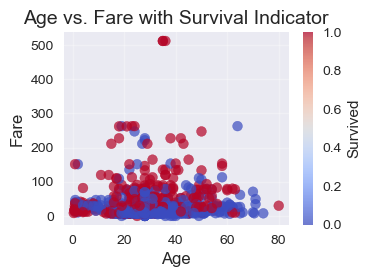

In [19]:
# 4. Scatter plot: Age vs Fare with survival color
plt.subplot(2, 2, 4)
scatter = plt.scatter(
    titanic['age'],
    titanic['fare'], 
    c=titanic['survived'], 
    cmap='coolwarm', 
    alpha=0.7, 
    s=50
)
plt.colorbar(scatter, label='Survived')
plt.title('Age vs. Fare with Survival Indicator', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(True, alpha=0.3)

In [20]:
# Adjust layout and display
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

### Additional Visualizations

Let's create more advanced visualizations to gain deeper insights:

1. Bar chart: Shows survival rates by both sex and class
2. Correlation heatmap: Reveals relationships between numerical features
3. Box plot: Displays fare distribution across passenger classes
4. Count plot: Examines passenger counts by embarkation port with survival overlay

In [21]:
# Bonus: Additional visualizations for deeper insights
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

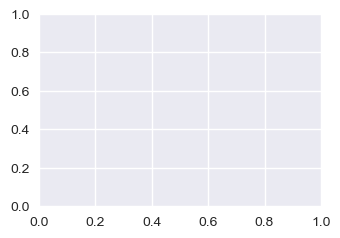

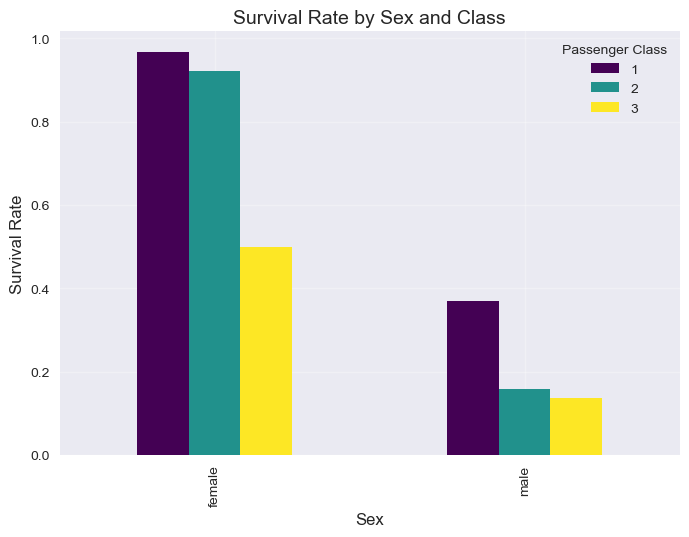

In [22]:
# 5. Survival rate by sex and class
plt.subplot(2, 2, 1)
sex_class_survival = titanic.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')
sex_class_survival.plot(kind='bar', colormap='viridis')
plt.title('Survival Rate by Sex and Class', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Passenger Class')

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

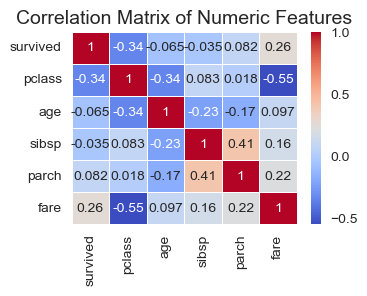

In [23]:
# 6. Correlation heatmap
plt.subplot(2, 2, 2)
numeric_cols = titanic.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11548\1816476080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=titanic, palette='Set3')


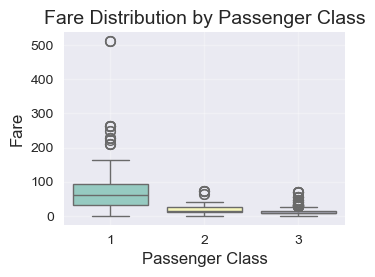

In [24]:
# 7. Box plot for fare by passenger class
plt.subplot(2, 2, 3)
sns.boxplot(x='pclass', y='fare', data=titanic, palette='Set3')
plt.title('Fare Distribution by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid(True, alpha=0.3)


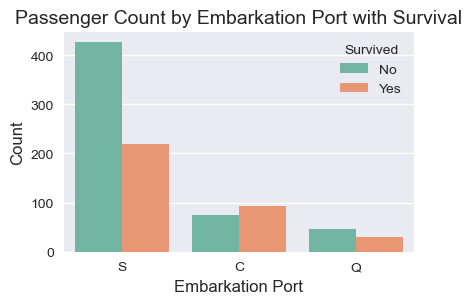

In [25]:
# 8. Count plot for embarked location and survival
if 'embarked' in titanic.columns:
    plt.subplot(2, 2, 4)
    sns.countplot(x='embarked', hue='survived', data=titanic, palette='Set2')
    plt.title('Passenger Count by Embarkation Port with Survival', fontsize=14)
    plt.xlabel('Embarkation Port', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [26]:
# Print final insights
print("\nKey Findings from the Analysis:")
print("1. Women had a much higher survival rate than men.")
print("2. Passengers in First Class had a significantly higher chance of survival.")
print("3. Children under 12 years old had better survival rates in general.")
print("4. Passengers who paid higher fares generally had a better chance of survival.")
print("5. There's a negative correlation between passenger class and survival rate.")


Key Findings from the Analysis:
1. Women had a much higher survival rate than men.
2. Passengers in First Class had a significantly higher chance of survival.
3. Children under 12 years old had better survival rates in general.
4. Passengers who paid higher fares generally had a better chance of survival.
5. There's a negative correlation between passenger class and survival rate.
